In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request 

work_dir = 'D:/5_us_txt/data/5 min/us/nasdaq stocks/'
# work_dir = '/home/minx/Documents/stock_data'

In [2]:
import glob

# for non-specific stock choices
dir_ = glob.glob(work_dir + '*/*') # all nasdaq stocks
df_raw = pd.read_csv(dir_[89])

In [3]:
df_raw = pd.read_csv(work_dir + '1/aapl.us.txt')
df_raw.columns = ['ticker','period','date','time','open',
              'high','low','close','vol','openint']


In [4]:
df_raw

,ticker,period,date,time,open,high,low,close,vol,openint
0,AAPL.US,5,20201015,153000,118.520,119.580,117.95,119.130,5328872,0
1,AAPL.US,5,20201015,153500,119.120,119.960,119.02,119.500,2227343,0
2,AAPL.US,5,20201015,154000,119.510,120.070,119.43,120.030,1691062,0
3,AAPL.US,5,20201015,154500,120.040,120.040,119.66,119.830,1734908,0
4,AAPL.US,5,20201015,155000,119.840,120.430,119.72,120.320,2151231,0
...,...,...,...,...,...,...,...,...,...,...
2739,AAPL.US,5,20201204,213500,122.035,122.035,121.90,121.960,670605,0
2740,AAPL.US,5,20201204,214000,121.960,122.150,121.88,122.015,1006254,0
2741,AAPL.US,5,20201204,214500,122.010,122.080,121.97,122.030,956046,0
2742,AAPL.US,5,20201204,215000,122.026,122.130,121.98,122.120,1312050,0


In [5]:
from utils import *

rsi_list = mult_rsi(df_raw.open.values)
macd_list, signal_list = mult_macd(df_raw.open.values)
rsi_ema_list = mult_ema(rsi_list) 

In [6]:
print(len(rsi_list), len(macd_list), len(signal_list))

2734 2718 2710


In [7]:
names = ['rsi','macd','signal','rsi_ema']
lists = [rsi_list, macd_list, signal_list, rsi_ema_list]
for i in range(len(names)):
    lead_ = [np.nan] * (df_raw.shape[0] - len(lists[i]))
    lead_.extend(lists[i])
    df_raw[names[i]] = lead_


In [8]:
df_raw.head(30)

,ticker,period,date,time,open,high,low,close,vol,openint,rsi,macd,signal,rsi_ema
0,AAPL.US,5,20201015,153000,118.52,119.58,117.95,119.13,5328872,0,NaN,NaN,NaN,NaN
1,AAPL.US,5,20201015,153500,119.12,119.96,119.02,119.50,2227343,0,NaN,NaN,NaN,NaN
2,AAPL.US,5,20201015,154000,119.51,120.07,119.43,120.03,1691062,0,NaN,NaN,NaN,NaN
3,AAPL.US,5,20201015,154500,120.04,120.04,119.66,119.83,1734908,0,NaN,NaN,NaN,NaN
4,AAPL.US,5,20201015,155000,119.84,120.43,119.72,120.32,2151231,0,NaN,NaN,NaN,NaN
5,AAPL.US,5,20201015,155500,120.31,120.36,119.85,119.99,1696847,0,NaN,NaN,NaN,NaN
6,AAPL.US,5,20201015,160000,119.97,120.17,119.52,119.58,1682806,0,NaN,NaN,NaN,NaN
7,AAPL.US,5,20201015,160500,119.59,119.86,119.19,119.24,1791776,0,NaN,NaN,NaN,NaN
8,AAPL.US,5,20201015,161000,119.23,119.45,119.19,119.29,1471070,0,NaN,NaN,NaN,NaN
9,AAPL.US,5,20201015,161500,119.28,119.86,119.00,119.71,1954576,0,NaN,NaN,NaN,NaN


In [9]:
from scipy.ndimage.interpolation import shift

# historical open calculations
n_history = 6
for i in range(n_history):
    df_raw['open_shift_' + str(i)] = shift(df_raw['open'].values, i, cval = np.nan)
for i in range(1,n_history):
    df_raw['open_shift_prop_' + str(i)] = (df_raw['open_shift_' + str(i)] - df_raw['open_shift_' + str(i-1)]) / df_raw['open_shift_' + str(i-1)]
for i in range(1,n_history):
    df_raw['open_shift_prop_curr_' + str(i)] = (df_raw['open_shift_' + str(i)] - df_raw['open']) / df_raw['open']

In [11]:
# for i in range(n_history):
#     df_raw['rsi_shift_' + str(i)]

In [12]:
list(df_raw)

['ticker',
 'period',
 'date',
 'time',
 'open',
 'high',
 'low',
 'close',
 'vol',
 'openint',
 'rsi',
 'macd',
 'signal',
 'rsi_ema',
 'open_shift_0',
 'open_shift_1',
 'open_shift_2',
 'open_shift_3',
 'open_shift_4',
 'open_shift_5',
 'open_shift_prop_1',
 'open_shift_prop_2',
 'open_shift_prop_3',
 'open_shift_prop_4',
 'open_shift_prop_5',
 'open_shift_prop_curr_1',
 'open_shift_prop_curr_2',
 'open_shift_prop_curr_3',
 'open_shift_prop_curr_4',
 'open_shift_prop_curr_5']

In [13]:
delta = df_raw['open'].values[1:] - df_raw['open'].values[:-1]
label = delta > 0
label = np.append(label, [np.nan])
df_raw['label'] = label

In [14]:
df = df_raw[~df_raw['signal'].isna()].copy();
df = df.iloc[:-1]

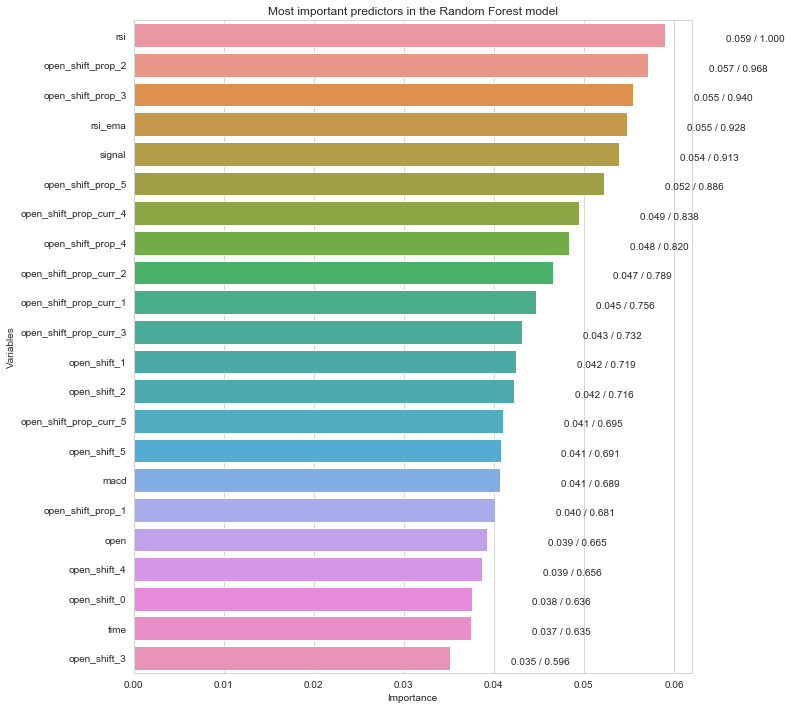

 
         pred
         0.0   1.0
true 0.0 221   39
     1.0 232   50
                     Measure   Value
0                   Accuracy  0.5000
1              Precision/PPV  0.5618
2     Sensitivity/TPR/Recall  0.1773
3            Specificity/TNR  0.8500
4                 Error Rate  0.5000
5  False Positive Rate (FPR)  0.1500
6                    F-Score  0.2695


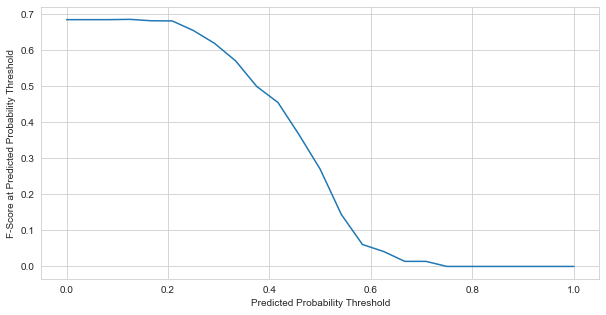

Max F-Score (68.53%) at threshold = 0.12
Summary at Max F-Score
 
         pred
         0.0   1.0
true 0.0 1     259
     1.0 0     282
                     Measure   Value
0                   Accuracy  0.5221
1              Precision/PPV  0.5213
2     Sensitivity/TPR/Recall  1.0000
3            Specificity/TNR  0.0038
4                 Error Rate  0.4779
5  False Positive Rate (FPR)  0.9962
6                    F-Score  0.6853


(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=10,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False), 0.125)

In [15]:
not_xcols = ['ticker','period','date','high','low','close','vol','openint','label']
xcols = list(df.drop(not_xcols, axis = 1))
ycol = 'label'
rf_build(df, xcols, ycol, how_split = 'sequential', disp_conf_mat = True)